# Mall Customer Segmentation Data
All companies divide their clients in different categories depending on their personal preferences, characteristics or behaviours. To each category companies design different marketing strategies.
This is a non supervised technique.

**Context**

You own the mall and want to understand the customers like who can be easily converge so that the sense can be given to marketing team and plan the strategy accordingly.

**Columns**
* CustomerID: Unique ID assigned to the customer
* Gender: Gender of the customer
* Age: Age of the customer
* Annual Income (k$): Annual income of the customer
* Spending Score (1-100): Score assigned by the mail based on customer behaviour and spending nature

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sbn.set_theme()

## Analysis

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* There are no duplicated rows
* There are no rows with null values
* There are 200 registries

In [9]:
df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"}, inplace=True)

<Axes: xlabel='Age', ylabel='AnnualIncome'>

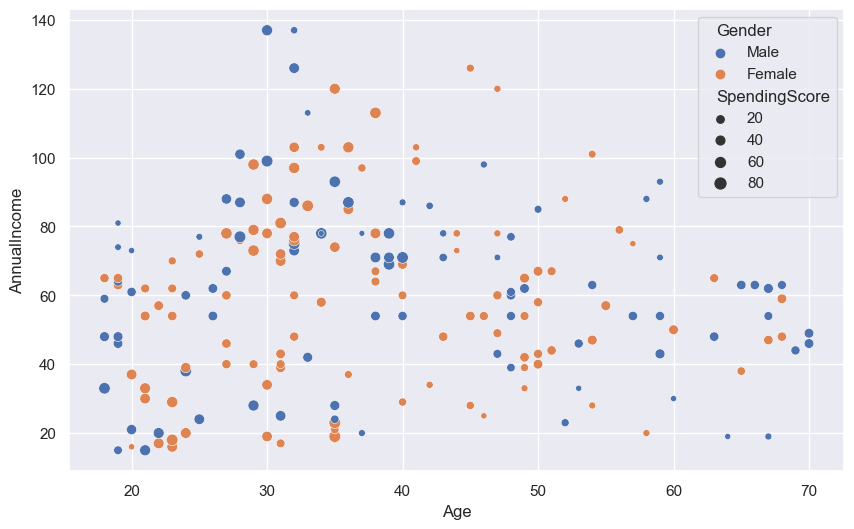

In [10]:
plt.figure(figsize=(10, 6))
sbn.scatterplot(df, x="Age", y="AnnualIncome", size="SpendingScore", hue="Gender")

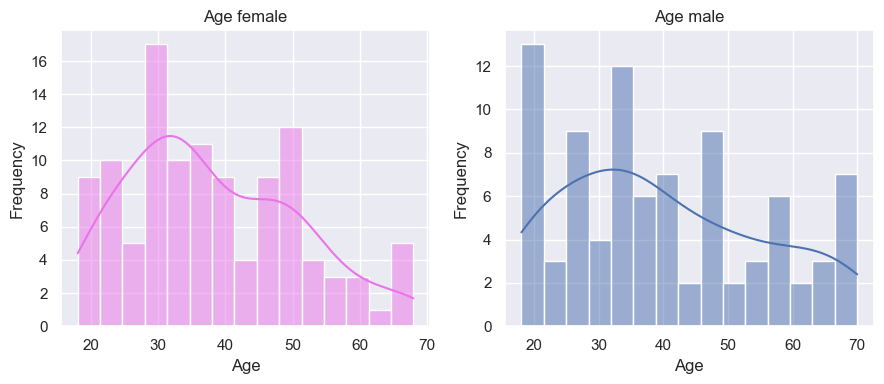

In [11]:
df_male = df[df["Gender"] == "Male"]
df_female = df[df["Gender"] == "Female"]
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 2)
sbn.histplot(df_male, x="Age", bins=15, kde=True)
plt.ylabel("Frequency")
plt.title("Age male")
plt.subplot(1, 2, 1)
sbn.histplot(df_female, x="Age", bins=15, kde=True, color="#eb73e9")
plt.ylabel("Frequency")
plt.title("Age female")
plt.tight_layout()
plt.show()

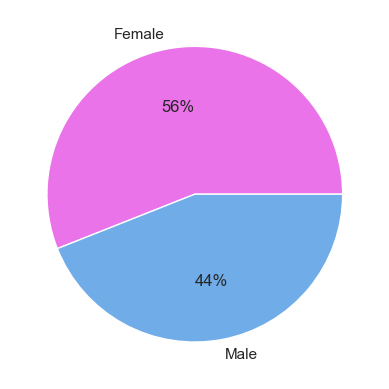

In [12]:
gender_vc = df["Gender"].value_counts()
plt.figure()
plt.pie(gender_vc, labels=gender_vc.index, autopct='%1.0f%%', colors=["#eb73e9", "#6face8"])
plt.show()

In [13]:
pd.DataFrame([gender_vc], columns=gender_vc.index)

Gender,Female,Male
count,112,88


* We can see that the most usual customers are between 25-40 years old.
* We bearly have more females than males so the dataset is not unbalanced.

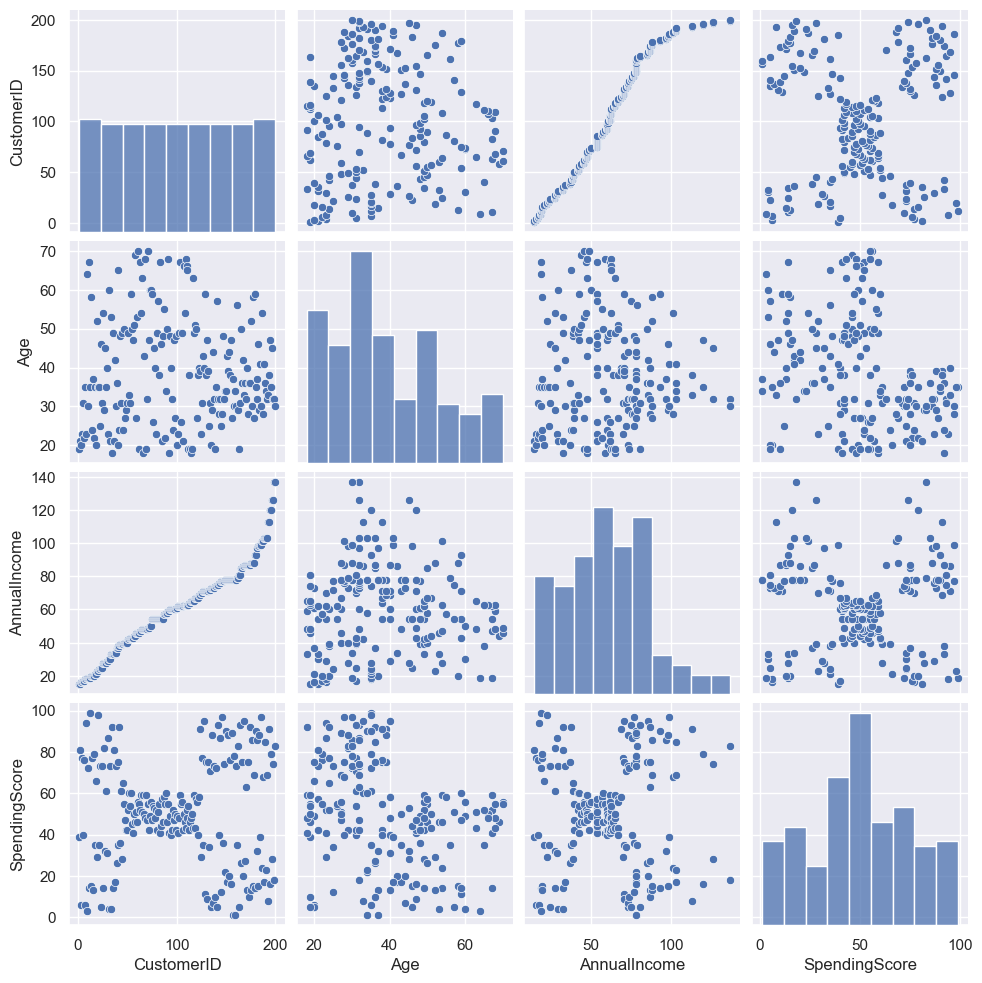

In [14]:
sbn.pairplot(df)

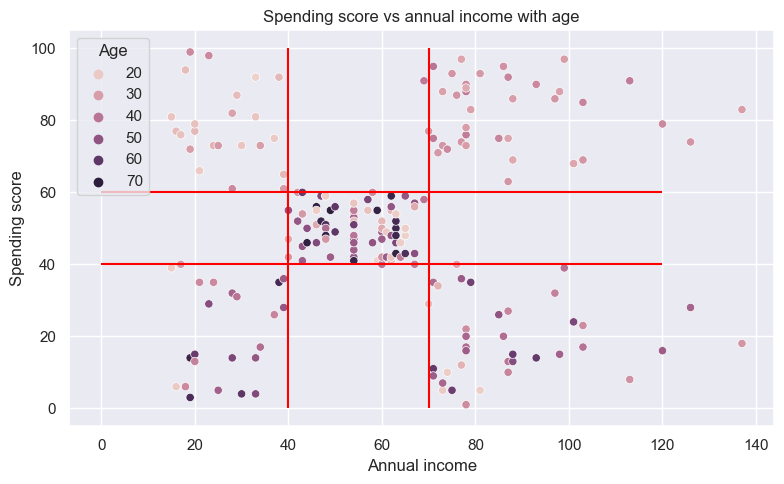

In [15]:
plt.figure(figsize=(8, 5))
sbn.scatterplot(df, x="AnnualIncome", y="SpendingScore", hue="Age")
plt.vlines(x=40, ymin=0, ymax=100, colors="red")
plt.vlines(x=70, ymin=0, ymax=100, colors="red")
plt.hlines(y=60, xmin=0, xmax=120, colors="red")
plt.hlines(y=40, xmin=0, xmax=120, colors="red")
plt.ylabel("Spending score")
plt.xlabel("Annual income")
plt.title("Spending score vs annual income with age")
plt.tight_layout()

We can see five well defined groups:
* Customers with annual income less than 40:
  1. Spending score less than 40: It's full of people around 40, 50 and 60. They are people who don't make much money and they control their spendings.
  2. Spending score more than 60: It's full of young people between 20-30. They don't make much money but they spend a lot.
* Customers with annual income between 40-70:
  3. These are the customers with more frequency. Most of them are over 20 years old. They make an average amount of money and have a moderated spending score.
* Customers with annual income over 70:
  4. Spending score more than 60: Full of people less than 40. They make much mony and spend a lot.
  5. Spending score less than 40: Most of them are old people. More than 40 years old. They make much money but don't spend too much.

We can identify 5 different behaviours so, our number of clusters should be 5. Anyways, let's check with the elbow technique.

In [16]:
kmeansarr = []
history = []
df_k = df[["SpendingScore", "AnnualIncome"]]
for i in range(1, 10):
    kmeans = KMeans(i, random_state=42, max_iter=100)
    kmeans.fit_transform(df_k)
    kmeansarr.append(kmeans)
    history.append(kmeans.inertia_)

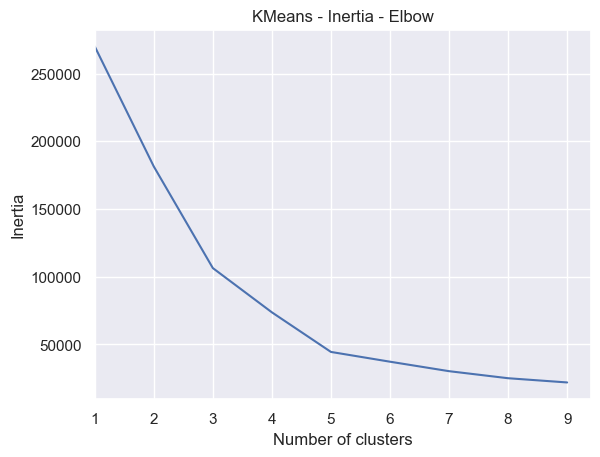

In [17]:
plt.figure()
plt.plot([i for i in range(1, len(history) + 1)], history)
plt.xlim(left=1)
plt.title("KMeans - Inertia - Elbow")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [18]:
kmeans = kmeansarr[4]
df_output = df.copy()
df_output["Class"] = [f"Class {class_number + 1}" for class_number in kmeans.predict(df_k)]

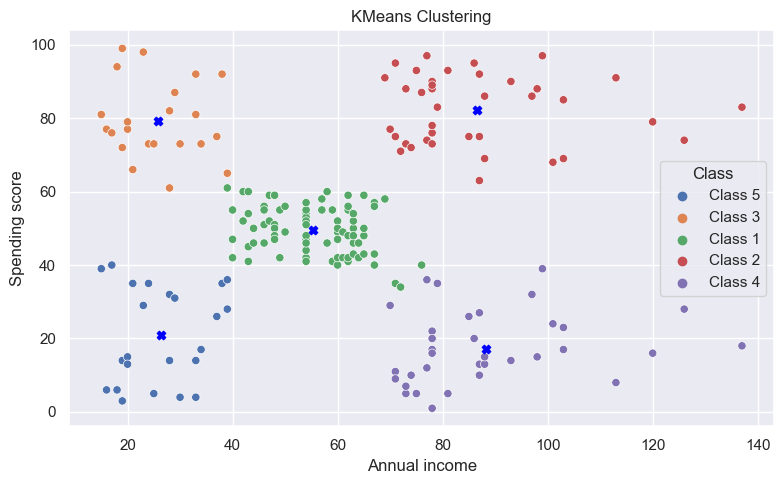

In [19]:
plt.figure(figsize=(8, 5))
sbn.scatterplot(df_output, x="AnnualIncome", y="SpendingScore", hue="Class")
plt.ylabel("Spending score")
plt.xlabel("Annual income")
plt.title("KMeans Clustering")
for center in kmeans.cluster_centers_:
    plt.scatter(center[1], center[0], marker="X", color="blue")
plt.tight_layout()